# Stability vs genome location

Here we want to know about the relationship between stability and genome distance: Are more stable genes located in similar locations on the genome in PAO1 vs PA14 compared to least stable genes?

We hypothesize that least stable genes are not syntenic (i.e. located in different regions of the genome) across strains, which might indicate different transcriptional re-wiring across strain types.

There are 2 approaches we take here:
1. For each least/most stable gene, get the neighboring core/homologous genes and determine if they match between PAO1 vs PA14.
2. Scale PA14 gene ids to same range as PAO1 then take distance between PAO1 gene and homolog of PAO1 gene

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import paths, utils

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User params
# Number of neighboring core genes to look at
# [- window, + window]
window = 10

## Load data

In [3]:
# Input similarity scores and annotations filenames
# Since the results are similar we only need to look at the scores for one strain type
pao1_similarity_filename = "pao1_core_similarity_associations_final_spell.tsv"
pa14_similarity_filename = "pa14_core_similarity_associations_final_spell.tsv"

In [4]:
# Import df
pao1_similarity = pd.read_csv(pao1_similarity_filename, sep="\t", index_col=0, header=0)
pa14_similarity = pd.read_csv(pa14_similarity_filename, sep="\t", index_col=0, header=0)

In [5]:
print(pao1_similarity.shape)
pao1_similarity.head()

(5349, 16)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN,84.379666,87.012773,0.000000,30.805250,56.083433,98.678794,743.594397,7.571223e+03,743.594397,[],NaN
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN,106.687908,91.482549,0.000000,50.280627,78.021322,118.345717,584.117921,8.369057e+03,584.117921,[],NaN
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN,2974.728597,4619.591491,0.000000,477.708748,1386.138060,3291.525419,41815.193043,2.134063e+07,41815.193043,['path:pae02010 : ABC transporters'],NaN
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN,448.628362,387.755818,18.128903,238.075927,370.338444,543.930949,5826.229102,1.503546e+05,5808.100199,[],NaN
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN,105.604816,85.534956,0.000000,47.418993,82.907779,144.322724,707.184303,7.316229e+03,707.184303,[],NaN


In [6]:
print(pa14_similarity.shape)
pa14_similarity.head()

(5347, 16)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PA14 id,,,,,,,,,,,,,,,,
PA14_23690,PA3125,0.185094,2.030432e-42,NaN,NaN,85.595452,101.121951,0.000000,25.546082,51.093537,104.536787,709.117909,1.022565e+04,709.117909,[],NaN
PA14_11480,PA4049,0.327795,3.869112e-134,NaN,NaN,198.132451,121.601925,0.000000,125.119670,168.451503,230.506602,1084.278966,1.478703e+04,1084.278966,[],NaN
PA14_01150,PA0094,0.418704,4.989573e-226,NaN,NaN,105.290577,111.218985,0.000000,39.297006,75.807135,124.150007,860.205738,1.236966e+04,860.205738,[],NaN
PA14_11460,PA4051,0.541759,0.000000e+00,thiL,NaN,234.395250,177.782645,16.650153,110.935215,188.025557,300.223243,1008.676242,3.160667e+04,992.026089,['path:pau00730 : Thiamine metabolism'],NaN
PA14_56780,PA4366,0.482227,1.451201e-309,sodB,NaN,7781.835203,7633.163594,412.593023,3450.004296,5718.029115,8591.327252,72482.666616,5.826519e+07,72070.073593,[],NaN


## Get most and least stable genes

In [7]:
pao1_least_stable = pao1_similarity[pao1_similarity["label"] == "least stable"].index
pao1_most_stable = pao1_similarity[pao1_similarity["label"] == "most stable"].index

## Get mapping from PAO1 to PA14 ids

In [8]:
pao1_annotation_filename = paths.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(pao1_annotation_filename, "pao1")

In [9]:
gene_mapping_pao1.head()

,Name,Product.Name,GeneID.(PAO1),PA14_ID,annotation,num_mapped_genes
PAO1_ID,,,,,,
PA0001,dnaA,chromosomal replication initiator protein DnaA,878417.0,PA14_00010,core,1.0
PA0002,dnaN,"DNA polymerase III, beta chain",879244.0,PA14_00020,core,1.0
PA0003,recF,RecF protein,879229.0,PA14_00030,core,1.0
PA0004,gyrB,DNA gyrase subunit B,879230.0,PA14_00050,core,1.0
PA0005,lptA,"lysophosphatidic acid acyltransferase, LptA",877576.0,PA14_00060,core,1.0


In [10]:
# Select only genes with 1-1 mapping
gene_mapping_pao1 = gene_mapping_pao1.query("num_mapped_genes==1")
# Select only PA14 column
gene_mapping_pao1 = gene_mapping_pao1["PA14_ID"].to_frame()

In [11]:
gene_mapping_pao1.head()

,PA14_ID
PAO1_ID,
PA0001,PA14_00010
PA0002,PA14_00020
PA0003,PA14_00030
PA0004,PA14_00050
PA0005,PA14_00060


## Approach 1

Recall that we want to determine if least stable genes are located in the same location on the genome in PAO1 and PA14.

This approach starts with the least stable core gene in PAO1 and selects its nearest core neighbors (the number of neighbors is specified by `window_size`). Then we map that least stable core gene to PA14. Starting with the homologous least stable core gene in PA14 select its nearest core neighbors. Next, since these neighbors are core genes can map between PAO1 and PA14. We compare the two sets of neighbors and determine how many of the neighbors in PAO1 map to the PA14 neighbors. If the percent of neighbors that match are high then this indicates that the starting least stable gene is located a similar location in both PAO1 and PA14 because the neighboring genes are the same.

In [12]:
def percent_matching_homologs(
    pao1_core_genes_df,
    pa14_core_genes_df,
    gene_id_mapping_df,
    window_size,
    core_genes_to_examine,
):
    """
    Function that compares the neighboring core genes between PAO1
    and PA14. For each most and least stable gene, we select the
    neighboring core genes and determine if the neighboring core
    genes in PAO1 match with the ones in PA14. If the proprotion
    of matches is high then that indicates that the most/least stable
    genes is located in the same relative position on the genome
    in PAO1 and PA14.

    Arguments:
    ----------
    pao1_core_genes_df: df
        Dataframe generated by running notebooks:
        1_core_core_relationships_across_strains.ipynb to
        5_KEGG_enrichment_of_stable_genes.ipynb. This df
        contains PAO1 core genes as the index and associated
        transcriptional similarity scores.
    pa14_core_genes_df: df
        Dataframe generated by running notebooks:
        1_core_core_relationships_across_strains.ipynb to
        5_KEGG_enrichment_of_stable_genes.ipynb. This df
        contains PA14 core genes as the index and associated
        transcriptional similarity scores.
    window_size: int
        How many neighboring core genes to look at
    gene_id_mapping_df: df
        Mapping PAO1 ids to PA14 ids
    core_genes_to_examine: df
        Least or most stable core genes using PAO1 ids
    """
    # Sort to make sure core ids are in order
    pao1_core_genes_df = pao1_core_genes_df.sort_index()
    pa14_core_genes_df = pa14_core_genes_df.sort_index()

    max_pao1 = pao1_core_genes_df.shape[0]
    max_pa14 = pa14_core_genes_df.shape[0]

    # List of percent overlap
    percent_overlap_lst = {}
    for pao1_id in core_genes_to_examine:
        # print(pao1_id)

        # Get PAO1 neighboring core genes
        pao1_gene_idx = pao1_core_genes_df.index.get_loc(pao1_id)
        # print(pao1_gene_idx)
        # print([pao1_gene_idx - window_size, pao1_gene_idx + window_size + 1])
        min_window = pao1_gene_idx - window_size
        max_window = pao1_gene_idx + window_size + 1

        new_idx = []
        for i in range(min_window, pao1_gene_idx):
            if i < 0:
                new_i = max_pao1 + i
                new_idx.append(new_i)
            else:
                new_idx.append(i)
        for j in range(pao1_gene_idx, max_window):
            if j > max_pao1 - 1:
                new_j = j % max_pao1
                new_idx.append(new_j)
            else:
                new_idx.append(j)
        # print(new_idx)
        pao1_gene_neighborhood_ids = pao1_core_genes_df.iloc[new_idx].index
        # print(pao1_gene_neighborhood_ids)

        # Remove least/most stable gene
        pao1_gene_neighborhood_ids = pao1_gene_neighborhood_ids.drop(labels=pao1_id)

        # print(pao1_gene_neighborhood_ids)

        # Map PAO1 least/most stable gene to PA14 id
        mapped_pa14_id = gene_id_mapping_df.loc[pao1_id, "PA14_ID"]
        # print(mapped_pa14_id)

        # Get PA14 neighboring core genes
        pa14_gene_idx = pa14_core_genes_df.index.get_loc(mapped_pa14_id)

        min_window = pa14_gene_idx - window_size
        max_window = pa14_gene_idx + window_size + 1

        new_idx = []
        for i in range(min_window, pa14_gene_idx):
            if i < 0:
                new_i = max_pa14 + i
                new_idx.append(new_i)
            else:
                new_idx.append(i)
        for j in range(pa14_gene_idx, max_window):
            if j > max_pa14 - 1:
                new_j = j % max_pa14
                new_idx.append(new_j)
            else:
                new_idx.append(j)
        pa14_gene_neighborhood_ids = pa14_core_genes_df.iloc[new_idx].index

        # Remove least/most stable gene
        pa14_gene_neighborhood_ids = pa14_gene_neighborhood_ids.drop(
            labels=mapped_pa14_id
        )

        # print(pa14_gene_idx)
        # print(pa14_gene_neighborhood_ids)

        # Convert neighboring PAO1 ids to PA14 ids
        mapped_pao1_gene_neighborhood_ids = gene_id_mapping_df.loc[
            pao1_gene_neighborhood_ids, "PA14_ID"
        ]
        # print(mapped_pao1_gene_neighborhood_ids)

        # Compare gene ids
        overlap_neighborhood_ids = set(pa14_gene_neighborhood_ids).intersection(
            set(mapped_pao1_gene_neighborhood_ids)
        )
        # print("overlap", overlap_neighborhood_ids)

        # Save percent matched core genes
        percent_overlap = len(overlap_neighborhood_ids) / (2 * window_size)
        # print(len(overlap_neighborhood_ids))
        percent_overlap_lst[pao1_id] = percent_overlap

    return percent_overlap_lst

In [13]:
least_matched_neighborhood = percent_matching_homologs(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_least_stable
)

In [14]:
most_matched_neighborhood = percent_matching_homologs(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_most_stable
)

In [15]:
# Random set of genes
random_gene_set = pao1_similarity.sample(len(pao1_least_stable)).index
random_matched_neighborhood = percent_matching_homologs(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, random_gene_set
)

## Approach 2

Recall that we want to determine if least stable genes are located in the same location on the genome in PAO1 and PA14.

This approach takes the genome location defined by the gene ids (PA####, PA14_####). The gene ids are converted into numeric values by dropping the "PA" or "PA14" prefix. Then the numeric ids are scaled to be in the same range since the number of genes in PA14 is more than in PAO1 - here we scaled the values to be in range 0-1. Then we take the absolute value of the difference between the least stable gene location in PAO1 versus the location in PA14. If the difference is small that would indicate the the most or least stable gene is located in a similar position in the genome in PAO1 and PA14.

In [16]:
def dist_pao1_pa14_homolog(
    pao1_core_genes_df,
    pa14_core_genes_df,
    gene_id_mapping_df,
    window_size,
    core_genes_to_examine,
):
    """
    Function calculates the distance between the least/most
    stable PAO1 gene compared to its PA14 homolog.
    This function first converts the gene ids into numeric
    values by dropping the "PA" or "PA14" prefix.
    Then the numeric ids are scaled to range 0-1 and the
    absolute difference is calculated between the most/least
    stable PAO1 and PA14 homolog gene. If the difference is
    small that would indicate the the most/least stable gene
    is located in a similar position in the genome in PAO1 and PA14.

    Arguments:
    ----------
    pao1_core_genes_df: df
        Dataframe generated by running notebooks:
        1_core_core_relationships_across_strains.ipynb to
        5_KEGG_enrichment_of_stable_genes.ipynb. This df
        contains PAO1 core genes as the index and associated
        transcriptional similarity scores.
    pa14_core_genes_df: df
        Dataframe generated by running notebooks:
        1_core_core_relationships_across_strains.ipynb to
        5_KEGG_enrichment_of_stable_genes.ipynb. This df
        contains PA14 core genes as the index and associated
        transcriptional similarity scores.
    window_size: int
        How many neighboring core genes to look at
    gene_id_mapping_df: df
        Mapping PAO1 ids to PA14 ids
    core_genes_to_examine: df
        Least or most stable core genes using PAO1 ids
    """
    diff_lst = []

    # Sort to make sure core ids are in order
    pao1_core_genes_df = pao1_core_genes_df.sort_index()
    pa14_core_genes_df = pa14_core_genes_df.sort_index()

    # Get number corresponding to PA id and scale to be between 0 - 1
    pao1_core_genes_df["PAO1_num"] = (
        pao1_core_genes_df.index.str.split("PA").str[-1].astype("float")
    )
    pao1_core_genes_df["PAO1_scaled"] = pao1_core_genes_df["PAO1_num"] / max(
        pao1_core_genes_df["PAO1_num"]
    )

    pa14_core_genes_df["PA14_num"] = (
        pa14_core_genes_df.index.str.split("PA14_").str[-1].astype("float")
    )
    pa14_core_genes_df["PA14_scaled"] = pa14_core_genes_df["PA14_num"] / max(
        pa14_core_genes_df["PA14_num"]
    )

    # Calculate the distance between most/least stable genes in PAO1 vs PA14
    # using scaled location
    for pao1_id in core_genes_to_examine:

        pao1_loc = pao1_core_genes_df.loc[pao1_id, "PAO1_scaled"]

        # Map PAO1 least/most stable gene to PA14 id
        mapped_pa14_id = gene_id_mapping_df.loc[pao1_id, "PA14_ID"]

        pa14_loc = pa14_core_genes_df.loc[mapped_pa14_id, "PA14_scaled"]

        # Calculate the difference
        pao1_vs_pa14_loc = abs(pao1_loc - pa14_loc)

        diff_lst.append(pao1_vs_pa14_loc)

    return diff_lst

In [17]:
pao1_least_dist = dist_pao1_pa14_homolog(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_least_stable
)

In [18]:
pao1_most_dist = dist_pao1_pa14_homolog(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_most_stable
)

In [19]:
pao1_random_dist = dist_pao1_pa14_homolog(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, random_gene_set
)

## Plot

In [20]:
# Format data for plotting
homolog_neighborhood_df = pd.DataFrame(
    data={
        "least stable % matching": list(least_matched_neighborhood.values()),
        "most stable % matching": list(most_matched_neighborhood.values()),
        "random % matching": list(random_matched_neighborhood.values()),
    }
)

homolog_neighborhood_df = (
    homolog_neighborhood_df.stack()
    .reset_index()
    .rename(columns={"level_1": "core gene group", 0: "value"})
)

In [21]:
homolog_dist_df = pd.DataFrame(
    data={
        "least stable dist": pao1_least_dist,
        "most stable dist": pao1_most_dist,
        "random dist": pao1_random_dist,
    }
)

homolog_dist_df = (
    homolog_dist_df.stack()
    .reset_index()
    .rename(columns={"level_1": "core gene group", 0: "value"})
)

Text(0, 0.5, '% neighboring core genes matched')

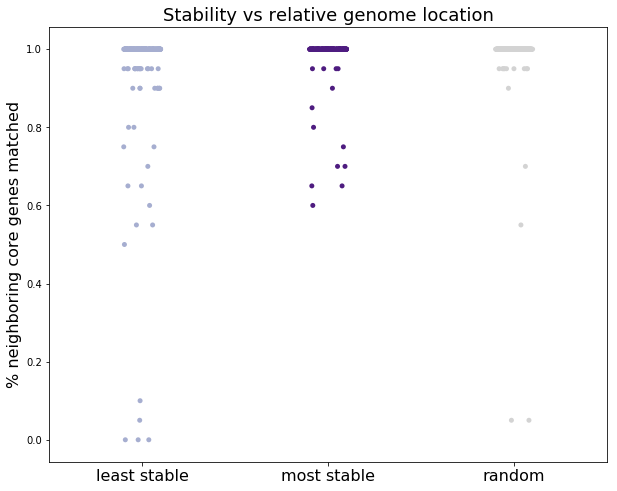

In [22]:
plt.figure(figsize=(10, 8))
fig_match_homolog = sns.stripplot(
    data=homolog_neighborhood_df,
    x="core gene group",
    y="value",
    jitter=True,
    palette={
        "least stable % matching": "#a6aed0ff",
        "most stable % matching": "#4e1c80",
        "random % matching": "lightgrey",
    },
)

fig_match_homolog.set_xticklabels(["least stable", "most stable", "random"], size=16)
plt.title("Stability vs relative genome location", fontsize=18)
plt.xlabel("")
plt.ylabel("% neighboring core genes matched", fontsize=16)

In [32]:
len(least_matched_neighborhood)
len([k for k, v in least_matched_neighborhood.items() if v > 0.2])

262

In [24]:
# Get the least stable core genes that have low % homolog core genes matched
# (i.e. least core genes that are located in different neighborhoods)
[k for k, v in least_matched_neighborhood.items() if v < 0.2]

['PA3507', 'PA2226', 'PA2520', 'PA3867', 'PA0982']

Text(0, 0.5, 'L1 Distance')

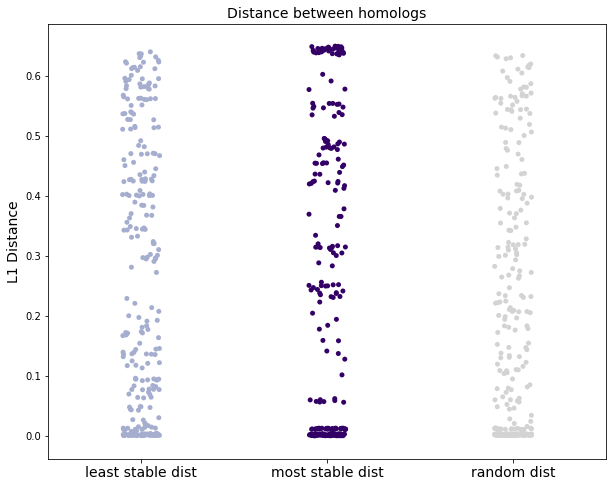

In [25]:
plt.figure(figsize=(10, 8))
fig_dist = sns.stripplot(
    data=homolog_dist_df,
    x="core gene group",
    y="value",
    palette={
        "least stable dist": "#a6aed0ff",
        "most stable dist": "#330066",
        "random dist": "lightgrey",
    },
)

plt.title("Distance between homologs", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
plt.ylabel("L1 Distance", fontsize=14)

In [26]:
# Save
fig_match_homolog.figure.savefig(
    "stability_percent_match_homolog.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

fig_dist.figure.savefig(
    "stability_dist.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

'# Save\nfig_match_homolog.figure.savefig(\n    "stability_percent_match_homolog.svg",\n    format="svg",\n    bbox_inches="tight",\n    transparent=True,\n    pad_inches=0,\n    dpi=300,\n)\n\nfig_dist.figure.savefig(\n    "stability_dist.svg",\n    format="svg",\n    bbox_inches="tight",\n    transparent=True,\n    pad_inches=0,\n    dpi=300,\n)'

* Both approaches yeild similar trends which is good. So the signal is robust.
* However, both approaches find that there is not a strong association between stability and if the gene is located in the same location across strain types. We thought that least stable genes might be located in a different location in PAO1 vs PA14 (i.e. we would expect L1 distance to be higher in least stable genes or percent matching homologs to be lower in least stable genes). We instead find that the distances and percent of matching homologs are similar between most and least stable genes. There might be some least stable genes that are located farther away in genome space, but the consistency of location isn't the primary driver behind these core genes being least stable.

TO DO: Read more about synteny:
* https://academic.oup.com/bioinformatics/article/36/Supplement_1/i21/5870523
* https://pubmed.ncbi.nlm.nih.gov/23323735/
* https://arxiv.org/pdf/1307.4291.pdf